<a href="https://colab.research.google.com/github/chindimaga/SHALA2020/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

gpu = tf.config.experimental.list_physical_devices("GPU")

2.2.0


In [2]:
gpu

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
tf.config.experimental.set_memory_growth(gpu[0],True)

Load data

In [4]:
(traindata, trainlabels),(testdata, testlabels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Prepare data

In [0]:
num_classes=10
image_height= 28
image_width = 28
image_channels = 1

In [0]:
traindata=traindata.reshape((traindata.shape[0],image_height,image_width,image_channels) )
testdata=testdata.reshape((testdata.shape[0],image_height,image_width,image_channels) )

In [0]:
traindata = traindata.astype("float32")/255.0
testdata = testdata.astype("float32")/255.0

In [0]:
traindata = np.pad(traindata,((0,0),(2,2),(2,2),(0,0)), 'constant')
testdata = np.pad(testdata,((0,0),(2,2),(2,2),(0,0)), 'constant')

In [9]:
print(traindata.shape)
print(trainlabels.shape)
print(testdata.shape)
print(testlabels.shape)

(60000, 32, 32, 1)
(60000,)
(10000, 32, 32, 1)
(10000,)


In [0]:
num_classes=10
image_height= 32
image_width = 32
image_channels = 1

In [0]:
from tensorflow.keras import backend, models, layers

In [0]:
class LeNet:
  @staticmethod
  def init(numChannels, imgRows, imgCols, numClasses, weightsPath=None):
    if backend.image_data_format() == "channel_first":
      inputShape = (numChannels, imgRows, imgCols)
    else:
         inputShape = ( imgRows, imgCols, numChannels)

    model = models.Sequential()

    model.add(layers.Conv2D(filters= 6, kernel_size=(5,5),strides=(1,1),padding='valid', activation=tf.nn.tanh, input_shape=inputShape))
    model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(layers.Conv2D(filters= 16, kernel_size=(5,5),strides=(1,1),padding='valid', activation=tf.nn.tanh, input_shape=inputShape))
    model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(units = 120,  activation=tf.nn.tanh))
    model.add(layers.Dense(units = 84,  activation=tf.nn.tanh))
    model.add(layers.Dense(units =numClasses,  activation=tf.nn.softmax))

    if weightsPath is not None:
      model.load_weights(weightsPath)
      
    return model  



Compile

In [0]:
model = LeNet.init(numChannels=image_channels, imgRows=image_height, imgCols=image_width, numClasses=num_classes)

In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = None):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy, so training stopped")
      self.model.stop_training = True

In [0]:
batch_size = 128
epochs = 100

Training

In [18]:
history = model.fit(x=traindata, y = trainlabels, validation_data=(testdata, testlabels), batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[myCallback()])

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 1.1178 - accuracy: 0.7166 - val_loss: 0.5377 - val_accuracy: 0.8699
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4627 - accuracy: 0.8790 - val_loss: 0.3813 - val_accuracy: 0.8975
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3667 - accuracy: 0.8981 - val_loss: 0.3221 - val_accuracy: 0.9099
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3205 - accuracy: 0.9092 - val_loss: 0.2870 - val_accuracy: 0.9176
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2902 - accuracy: 0.9165 - val_loss: 0.2608 - val_accuracy: 0.9246
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2668 - accuracy: 0.9227 - val_loss: 0.2410 - val_accuracy: 0.9309
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2474 - accuracy: 0.9274 - val_loss: 0.2242 - val_accuracy: 0.9349

<Figure size 432x288 with 0 Axes>

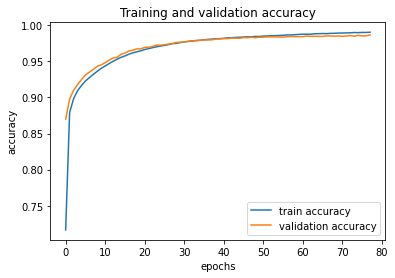

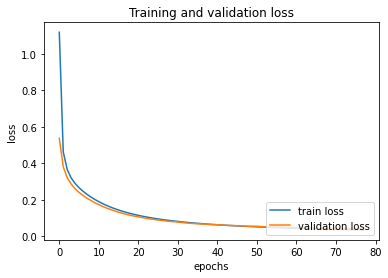

<Figure size 432x288 with 0 Axes>

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs  = range(len(acc))

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="lower right")
plt.title('Training and validation loss')
plt.figure()

In [21]:
(loss , accuracy)=model.evaluate(testdata, testlabels, batch_size=batch_size, verbose=1)
print(f"Accuracy : {accuracy}")

79/79 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9864
Accuracy : 0.9864000082015991


In [0]:
model.save_weights("/content/LeNetMNIST.temp.hdf5", overwrite=True)

Evaluate pretrained

In [24]:
pre = LeNet.init(numChannels=image_channels, imgRows=image_height, imgCols=image_width, numClasses=num_classes, weightsPath='/content/LeNetMNIST.temp.hdf5')
pre.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
pre.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [25]:
(loss , accuracy) = pre.evaluate(testdata, testlabels, batch_size=batch_size, verbose=1)
print(f"Accuracy : {accuracy}")

79/79 [==============================] - 0s 4ms/step - loss: 0.0421 - accuracy: 0.9864
Accuracy : 0.9864000082015991


Fashion MNIST

In [0]:
(traindata, trainlabels),(testdata, testlabels) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
classnames = ["T-shirt/top","Trouser/pants","Pullover shirt","Dress","Coat","Sandal","Shirt","Sneaker"]

In [43]:
num_classes=10
image_height= 28
image_width = 28
image_channels = 1
traindata=traindata.reshape((traindata.shape[0],image_height,image_width,image_channels) )
testdata=testdata.reshape((testdata.shape[0],image_height,image_width,image_channels) )
traindata = traindata.astype("float32")/255.0
testdata = testdata.astype("float32")/255.0
traindata = np.pad(traindata,((0,0),(2,2),(2,2),(0,0)), 'constant')
testdata = np.pad(testdata,((0,0),(2,2),(2,2),(0,0)), 'constant')
num_classes=10
image_height= 32
image_width = 32
image_channels = 1
print(traindata.shape)
print(trainlabels.shape)
print(testdata.shape)
print(testlabels.shape)

(60000, 32, 32, 1)
(60000,)
(10000, 32, 32, 1)
(10000,)


In [44]:
fmodel = LeNet.init(numChannels=image_channels, imgRows=image_height, imgCols=image_width, numClasses=num_classes)
fmodel.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
fmodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

In [45]:
batch_size = 128
epochs = 100
fhistory = fmodel.fit(x=traindata, y = trainlabels, validation_data=(testdata, testlabels), batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[myCallback()])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 1.2341 - accuracy: 0.6110 - val_loss: 0.8318 - val_accuracy: 0.7201
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.7238 - accuracy: 0.7445 - val_loss: 0.6825 - val_accuracy: 0.7523
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6273 - accuracy: 0.7724 - val_loss: 0.6253 - val_accuracy: 0.7687
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5780 - accuracy: 0.7918 - val_loss: 0.5862 - val_accuracy: 0.7861
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5453 - accuracy: 0.8054 - val_loss: 0.5569 - val_accuracy: 0.7996
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5209 - accuracy: 0.8156 - val_loss: 0.5396 - val_accuracy: 0.8029
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4998 - accuracy: 0.8239 - val_loss: 0.5174 - val_accuracy: 0.8112

<Figure size 432x288 with 0 Axes>

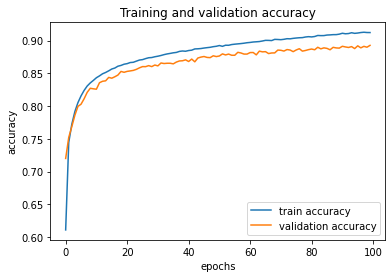

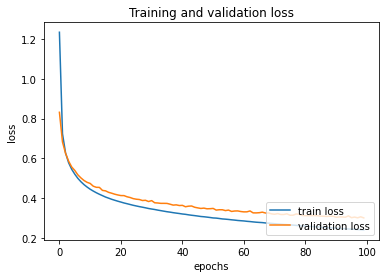

<Figure size 432x288 with 0 Axes>

In [46]:
acc = fhistory.history['accuracy']
val_acc = fhistory.history['val_accuracy']
loss = fhistory.history['loss']
val_loss = fhistory.history['val_loss']

epochs  = range(len(acc))

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="lower right")
plt.title('Training and validation loss')
plt.figure()